# Evolutionary Algorithm

## Jupyter Housekeeping

In [4]:
import os
import sys
print("Present working directory:", os.getcwd())

def go_to_project_root():
    path = os.path.join(os.getcwd(), '..')
    print(path)
    sys.path.append(path)
    os.chdir(path)
    print("Present working directory:", os.getcwd())
    
go_to_project_root()

Present working directory: C:\Users\Zachary\Documents\GitHub\COMP 3201 - TSP Evolutionary Algorithm\src
C:\Users\Zachary\Documents\GitHub\COMP 3201 - TSP Evolutionary Algorithm\src\..
Present working directory: C:\Users\Zachary\Documents\GitHub\COMP 3201 - TSP Evolutionary Algorithm


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure as Figure
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# https://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
# https://matplotlib.org/users/pyplot_tutorial.html

# Set up the style of the graphs, and display a sample graph
graph_style = 5
plt.style.use(plt.style.available[graph_style])  # 5, 14, 22
sns.set_context("paper")

## Imports and Function Declarations

In [6]:
# Standard Imports
# These should not be changed, as they are used to set the 'constant'
# global variables for each module.
from EA_Methods.Pandas_Rep import ParentSelectionMethods as PSM
from EA_Methods.Pandas_Rep import RecombinationMethods as RM
from EA_Methods.Pandas_Rep import MutationMethods as MM
from EA_Methods.Pandas_Rep import SurvivorSelectionMethods as SSM

# Modular Imports
# Modular Problem Definition
# By changing this import, you can easily redifine the problem you are 
# attempting to solve, without having to re-write much of the code.
from Setups.TSP import TSP_PDS as DEF


# Modular Function 'Declarations'
# By swapping out which functions are accessed the entire structure of the 
# EA algorithm can be changed without rewriting code in the main method.
parse_file          =      DEF.read_tsp_file
eval_fitness        =      DEF.euclidean_distance
initialize          =      DEF.random_initialization
parent_selection    =      PSM.roulette
generate_offspring  =      RM.order_crossover
apply_mutation      =      MM.permutation_swap
select_survivors    =      SSM.replacement


# Global Variable Initialization
FILENUM             =      1  # Changing this variable changes which file to parse.
genome_length       =      parse_file(FILENUM)
generation_limit    =      100
population_size     =      60
mating_pool_size    =      population_size//2 if (population_size//2) % 2 == 0 else (population_size//2)+1  # has to be even

tournament_size     =      population_size//10
crossover_rate      =      0.9
crossover_point     =      genome_length//3
mutation_rate       =      0.2


# Key Variable Setters
# These functions typically do not need to be changed, and simply allow
# easy changing of all rates and variables from the variables above.
PSM.set_tournament_size(tournament_size)
RM.set_genome_length(genome_length)
RM.set_crossover_point(crossover_point)
RM.set_crossover_rate(crossover_rate)
MM.set_genome_length(genome_length)
MM.set_mutation_rate(mutation_rate)
MM.set_fitness_function(eval_fitness)
SSM.set_population_size(population_size)
SSM.set_mating_pool_size(mating_pool_size)
DEF.set_fitness_function(eval_fitness)

def set_ops(maximize): # Sets dynamic standard for 'best'
    op = max if maximize else min
    PSM.set_op(op)
    SSM.set_op(op)
    DEF.set_op(op)

DEF.CITIES.head()

,Longitude (Range shifted),Latitude (Range shifted)
City,,
0,-3314.58335,-3633.33335
1,-3247.91665,-3600.00005
2,-2847.91665,449.99995
3,-2547.91665,-683.33335
4,-2547.91665,-1500.00005


## Main Code

In [7]:
def evolution_algorithm(maximize, print_gens=True, display_freq=None):
    if display_freq is None: display_freq = generation_limit
    
    set_ops(maximize)                                           # Sets dynamic standard for 'best'
    population = initialize(population_size, genome_length)     # Initialize Population
    if print_gens: DEF.start_up_display()                       # Prints City Locations
    
    # Evolution starts
    for generation in range(generation_limit):
        # Generation Info
        if print_gens and (generation % display_freq == display_freq - 1):
            DEF.generation_display(population, generation+1)    # Displays Best Path
    
        parents = parent_selection(population, mating_pool_size)# Parent Selection
        offspring = generate_offspring(parents)                 # Parent Recombination
        offspring = apply_mutation(offspring)                   # Mutation Application
        population = select_survivors(population, offspring)    # Survivor Selection
    # Evolution ends
        
    # Final Fitness Info
    DEF.final_display(population)



Displaying information every 10 generations.


Generation: 10
 - Best fitness: 99095.51092951931
 - Avg. fitness: fitnesses    83164.041198
dtype: float64
 - Number of optimal solutions: 1/60

Generation: 20
 - Best fitness: 96446.02870157707
 - Avg. fitness: fitnesses    72706.94412
dtype: float64
 - Number of optimal solutions: 1/60

Generation: 30
 - Best fitness: 89796.29222160413
 - Avg. fitness: fitnesses    62856.081502
dtype: float64
 - Number of optimal solutions: 1/60

Generation: 40
 - Best fitness: 71585.61674968844
 - Avg. fitness: fitnesses    57030.412175
dtype: float64
 - Number of optimal solutions: 1/60

Generation: 50
 - Best fitness: 81589.3099136998
 - Avg. fitness: fitnesses    57578.710864
dtype: float64
 - Number of optimal solutions: 1/60

Generation: 60
 - Best fitness: 72960.71560506328
 - Avg. fitness: fitnesses    56777.156989
dtype: float64
 - Number of optimal solutions: 1/60

Generation: 70
 - Best fitness: 68801.56881158422
 - Avg. fitness: fitnesses 

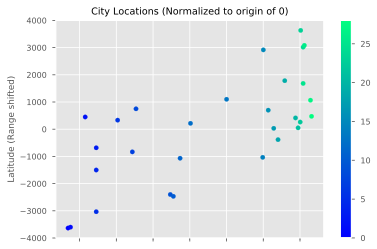

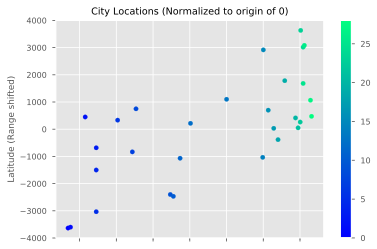

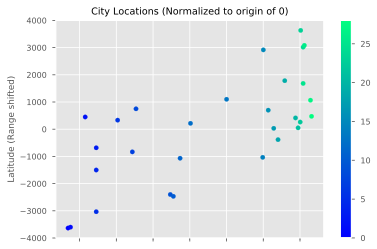

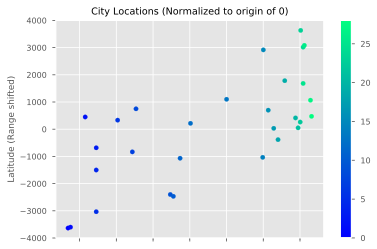

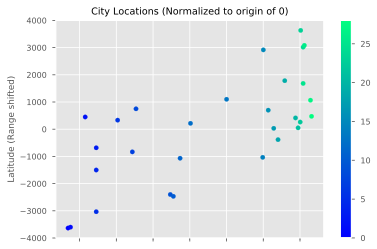

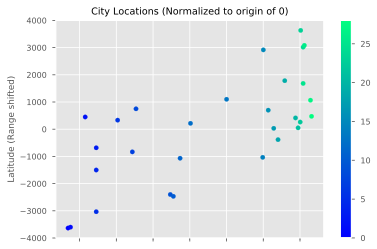

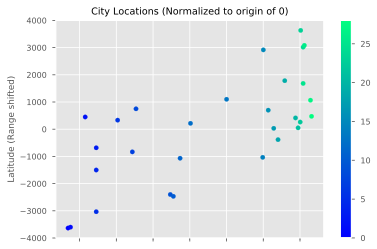

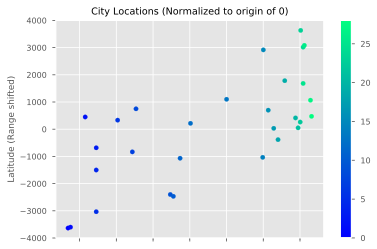

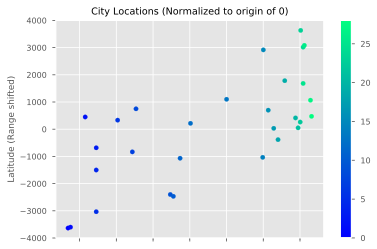

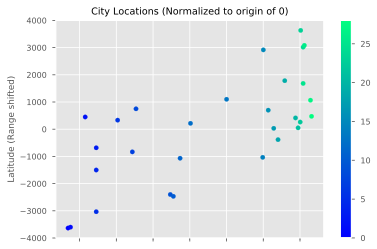

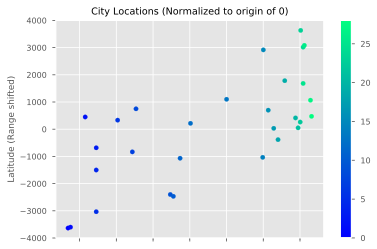

In [8]:
freq = min(int(generation_limit * 0.1), 500)
print('\n\nDisplaying information every {} generations.\n\n'.format(freq))
evolution_algorithm(False, True, freq)

## Temporary Method Testing

In [9]:
set_ops(maximize=False)

In [10]:
# random_initialization     - Finished
# heurisitic_initialization - Stub
initialize                  = DEF.random_initialization

population = initialize(population_size, genome_length)
population.head()
# type(population['individuals'][0])

,individuals,fitnesses
indexes,,
0,"[5, 7, 23, 4, 28, 3, 16, 13, 1, 15, 12, 20, 9,...",109237.760590
1,"[2, 18, 12, 6, 14, 16, 27, 13, 24, 7, 0, 23, 2...",107007.956365
2,"[7, 5, 16, 8, 20, 3, 27, 1, 4, 28, 24, 21, 26,...",108348.697831
3,"[9, 5, 2, 25, 28, 14, 24, 22, 3, 15, 27, 19, 1...",109237.394965
4,"[3, 14, 10, 19, 11, 2, 24, 21, 16, 4, 18, 28, ...",108393.725726


In [11]:
# mps               - In Progress
# tournament        - In Progress
# roulette          - Finished
# random_uniform    - Finished
parent_selection    = PSM.random_uniform

parents = parent_selection(population, mating_pool_size)
parents.head()

,individuals,fitnesses
0,"[2, 16, 4, 6, 0, 14, 18, 1, 13, 22, 23, 21, 17...",116414.770216
1,"[27, 15, 22, 18, 6, 17, 8, 25, 0, 13, 12, 23, ...",120686.389666
2,"[20, 4, 15, 6, 7, 28, 19, 24, 9, 0, 16, 10, 14...",108807.135639
3,"[0, 28, 4, 10, 7, 21, 15, 9, 25, 20, 24, 6, 14...",114771.172335
4,"[7, 15, 22, 24, 21, 9, 27, 12, 16, 4, 5, 13, 0...",103552.975742


In [14]:
# recombination_cut_crossover   - Finished
# recombination_pmx_crossover   - Stub
# recombination_edge_crossover  - Stub
# recombination_order_crossover - Stub
generate_offspring              = RM.order_crossover

offspring = generate_offspring(parents)
offspring

,individuals,fitnesses
0,"[2, 16, 4, 6, 0, 14, 18, 1, 13, 22, 23, 21, 17...",116414.770216
1,"[27, 15, 22, 18, 6, 17, 8, 25, 0, 13, 23, 21, ...",120686.389666
2,"[20, 4, 15, 6, 7, 28, 19, 24, 9, 0, 14, 17, 27...",108807.135639
3,"[0, 28, 4, 10, 7, 21, 15, 9, 25, 20, 24, 6, 14...",114771.172335
4,"[7, 15, 22, 24, 21, 9, 27, 12, 16, 4, 3, 25, 0...",103552.975742
5,"[7, 14, 28, 16, 4, 13, 27, 23, 6, 3, 5, 0, 2, ...",110840.576069
6,"[7, 16, 25, 21, 23, 27, 22, 17, 20, 12, 6, 2, ...",92404.595415
7,"[27, 28, 10, 8, 16, 5, 22, 20, 24, 23, 12, 4, ...",97623.067501
8,"[15, 27, 20, 28, 0, 9, 25, 3, 17, 19, 10, 4, 1...",109927.271654
9,"[18, 12, 21, 15, 3, 27, 14, 26, 22, 10, 19, 8,...",95973.129570


In [15]:
# permutation_swap       - Finished
# permutation_insert     - Stub
# permutation_inversion  - Stub
# permutation_scramble   - Stub
apply_mutation           = MM.permutation_swap

offspring = apply_mutation(offspring)
offspring.head()

,individuals,fitnesses
0,"[2, 16, 4, 6, 0, 14, 18, 1, 13, 22, 23, 21, 17...",116414.770216
1,"[27, 15, 22, 18, 6, 17, 8, 25, 0, 13, 23, 21, ...",119989.040530
2,"[20, 4, 15, 6, 7, 28, 19, 24, 9, 0, 14, 17, 27...",110714.529840
3,"[0, 28, 4, 10, 7, 21, 15, 9, 25, 20, 24, 6, 14...",114771.172335
4,"[7, 15, 22, 24, 21, 9, 27, 12, 16, 4, 3, 25, 0...",110722.662420


In [16]:
# mu_plus_lambda    - Finished
# replacement       - Finished
# random_uniform    - Finished
select_survivors    = SSM.mu_plus_lambda

population = select_survivors(population, offspring)
population.head()

,individuals,fitnesses
0,"[2, 27, 18, 23, 14, 19, 24, 28, 20, 5, 11, 22,...",97804.250407
1,"[14, 22, 7, 19, 20, 23, 2, 21, 15, 11, 9, 16, ...",99514.806907
2,"[20, 4, 15, 6, 7, 28, 19, 24, 9, 0, 13, 8, 1, ...",104630.528253
3,"[2, 18, 12, 6, 14, 16, 27, 13, 24, 7, 0, 23, 2...",107007.956365
4,"[3, 14, 10, 19, 11, 2, 24, 21, 16, 4, 18, 28, ...",108393.725726


## Helper Functions

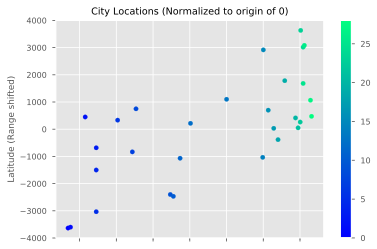

In [17]:
# Sahara
parse_file(1)
DEF.start_up_display()
#TSP.brute_force_solver()

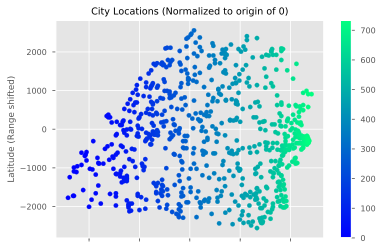

In [18]:
# Uraguay
parse_file(2)
DEF.start_up_display()
#TSP.brute_force_solver()

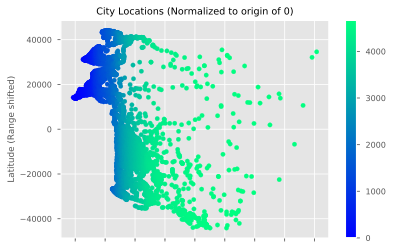

In [19]:
# Canada
parse_file(3)
DEF.start_up_display()
#TSP.brute_force_solver()